In [134]:
%config IPCompleter.greedy=True
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv('../src/datasets/auto/auto-mpg.csv')
data.head()
data.shape


(406, 9)

In [9]:
# Borrar los N/A
data['mpg']=data['mpg'].dropna()
data['horsepower']=data['horsepower'].dropna()


Text(0, 0.5, 'Millas por Galon')

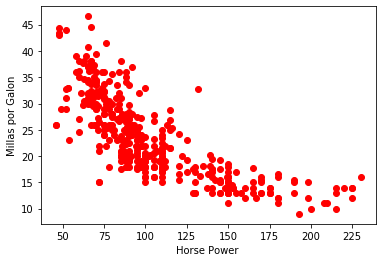

In [12]:
plt.plot(data['horsepower'], data['mpg'], 'ro')
plt.xlabel('Horse Power ')
plt.ylabel('Millas por Galon')

#La grafica tiene un atendencia exponencial..  parabola

## Modelo de regresion Lineal

#### MPG = a+b*HP

In [22]:
# DATOS DEL MODELO
X=data['horsepower'].fillna(data['horsepower'].mean())
Y=data['mpg'].fillna(data['mpg'].mean())

In [34]:
#Como X es unidimensional se debe crear un elemento con unadimensionalidad para que el modelo lo reciba como un Array
lm= LinearRegression()
x_data=X[:, np.newaxis]
lm.fit(x_data,Y)


LinearRegression()

In [35]:
type(X[:, np.newaxis])

numpy.ndarray

Text(0, 0.5, 'Millas por Galon')

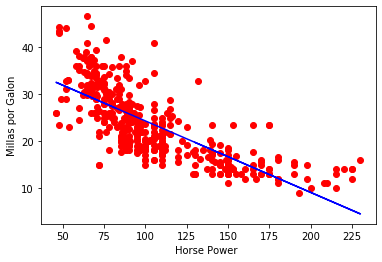

In [38]:
plt.plot(X,Y, 'ro')
plt.plot(X, lm.predict(x_data) , color="blue")
plt.xlabel('Horse Power ')
plt.ylabel('Millas por Galon')

#La grafica tiene un atendencia exponencial..  parabola

In [61]:
lm.score(x_data,Y)
SSD= np.sum((Y- lm.predict(x_data))**2)
RSE= np.sqrt(SSD/(len(x_data)-1))
y_mean=np.mean(Y)
error=RSE/y_mean

SSD,RSE,error,y_mean

(10315.751960060918,
 5.046879480825511,
 0.21462773361633472,
 23.514572864321607)

#### Se considera que el modelo puede optimizarse
#### Modelo de regresion cuadratico 

* mpg= a + b * HP^2 

In [73]:
x_data=X**2
x_data=x_data[:, np.newaxis]
lm=LinearRegression()
lm.fit(x_data,Y)

LinearRegression()

In [74]:
lm.score(x_data,Y)
lm.score(x_data,Y)
SSD= np.sum((Y- lm.predict(x_data))**2)
RSE= np.sqrt(SSD/(len(x_data)-1))
y_mean=np.mean(Y)
error=RSE/y_mean

SSD,RSE,error,y_mean


(12490.350340501926,
 5.553410772769817,
 0.23616889852998113,
 23.514572864321607)

## Modelo de regresion Lineal y cuadratico (Combinado)
* mpg= a + +b* HP + c * HP^2 

In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


In [91]:
poly = PolynomialFeatures(degree=2)
x_data=poly.fit_transform(X[:, np.newaxis])
lm= linear_model.LinearRegression()
lm.fit(x_data,Y)
lm.score(x_data, Y)
lm.intercept_ , lm.coef_

(55.02619244708036, array([ 0.        , -0.43404318,  0.00112615]))

In [133]:
def reg_validation(x_data, Y, y_predict):
    SSD= np.sum((Y- y_predict)**2)
    RSE= np.sqrt(SSD/(len(x_data)-1))
    y_mean=np.mean(Y)
    error=RSE/y_mean
    print("SSD: ",SSD,",   RSE:",RSE,",   Error:",error,",   Y-Mean:",y_mean)

for d in range (1,12):
    poly = PolynomialFeatures(degree=d)
    x_data=poly.fit_transform(X[:, np.newaxis])
    lm= linear_model.LinearRegression()
    lm.fit(x_data,Y)
    print("Regresion de grado: ", str(d))
    print(lm.score(x_data, Y))
    print(lm.intercept_)
    print(lm.coef_)   
    print(reg_validation(x_data, Y, lm.predict(x_data) ))
    print("  ")

    


Regresion de grado:  1
0.5746533406450252
39.53387982903449
[ 0.         -0.15244505]
SSD:  10315.751960060918 ,   RSE: 5.046879480825511 ,   Error: 0.21462773361633472 ,   Y-Mean: 23.514572864321607
None
  
Regresion de grado:  2
0.6439066584257469
55.02619244708036
[ 0.         -0.43404318  0.00112615]
SSD:  8636.180643524502 ,   RSE: 4.61778115803654 ,   Error: 0.196379546619069 ,   Y-Mean: 23.514572864321607
None
  
Regresion de grado:  3
0.6444678885560744
58.44877411191831
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD:  8622.569367428549 ,   RSE: 4.614140736300907 ,   Error: 0.19622473106036684 ,   Y-Mean: 23.514572864321607
None
  
Regresion de grado:  4
0.6467674189704502
40.09664384818936
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
SSD:  8566.799832491353 ,   RSE: 4.5991947315797574 ,   Error: 0.1955891250126879 ,   Y-Mean: 23.514572864321607
None
  
Regresion de grado:  5
0.6547512489367358
-40.693812902382106
[ 0

##### mpg_ 55.02619 -0.4434*HP + 0.001126*HP^2

### EL problema de los Outliers (Datos alejados de los valores centrales)

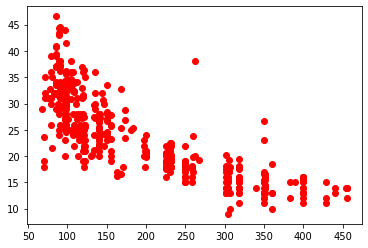

In [146]:
plt.plot(data['displacement'], data['mpg'], 'ro')

0.6261049762826918


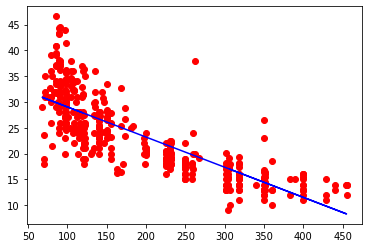

In [151]:
X=data['displacement'].fillna(data['displacement'].mean())
X=X[:, np.newaxis]
Y=data['mpg'].fillna(data['mpg'].mean())
lm= LinearRegression()
lm.fit(X, Y)
print(lm.score(X,Y))
plt.plot(data['displacement'], data['mpg'], 'ro')
plt.plot(X, lm.predict(X), color='blue')


#### Buscar el valor de Outlier

In [159]:
data[(data['displacement']>300)& (data['mpg']>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [160]:
data[(data['displacement']>250)& (data['mpg']>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [164]:
data_clean=data.drop(([395,258,305,372]))


#### Borrar por un momento los outliers para modelar de nuevo

0.6466514317531822


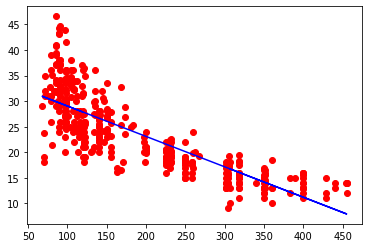

In [165]:
X=data_clean['displacement'].fillna(data_clean['displacement'].mean())
X=X[:, np.newaxis]
Y=data_clean['mpg'].fillna(data_clean['mpg'].mean())
lm= LinearRegression()
lm.fit(X, Y)
print(lm.score(X,Y))
plt.plot(data_clean['displacement'], data_clean['mpg'], 'ro')
plt.plot(X, lm.predict(X), color='blue')
